In [1]:
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


In [7]:
yellow = pd.read_parquet('../../mast30034-project-1-janggani/data/curated/yellow/yellow_w.parquet')
green = pd.read_parquet('../../mast30034-project-1-janggani/data/curated/green/green_w.parquet')

yellow_use = yellow[["temp_f", "wind speed", "distance"]]
green_use = green[["temp_f", "wind speed", "distance"]]

In [8]:
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

In [21]:
yellow_data = sqlContext.createDataFrame(yellow_use)
green_data = sqlContext.createDataFrame(green_use)

In [23]:
features = ["temp_f", "wind speed"]

va = VectorAssembler(inputCols = features, outputCol='features')
va_y = va.transform(yellow_data)
va_g = va.transform(green_data)
va_y = va_y.select(['features', 'distance'])
va_g = va_g.select(['features', 'distance'])

In [24]:
train_y, test_y = va_y.randomSplit([0.9,0.1])
train_g, test_g = va_g.randomSplit([0.9,0.1])
glr=GeneralizedLinearRegression(labelCol="distance",family="poisson",maxIter=10,regParam=0.3)

In [29]:
model_y = glr.fit(train_y)
model_g = glr.fit(train_g)

print(str(model_y.summary))

Coefficients:
    Feature Estimate Std Error T Value P Value
(Intercept)   1.2166    0.0373 32.6516  0.0000
     temp_f   0.0001    0.0006  0.2236  0.8231
 wind speed  -0.0048    0.0017 -2.7259  0.0064

(Dispersion parameter for poisson family taken to be 1.0000)
    Null deviance: 567.9211 on 3883 degrees of freedom
Residual deviance: 558.8461 on 3883 degrees of freedom
AIC: 12351.8209


In [30]:
print(str(model_g.summary))

Coefficients:
    Feature Estimate Std Error T Value P Value
(Intercept)   1.5018    0.0362 41.4492  0.0000
     temp_f  -0.0047    0.0006 -8.4891  0.0000
 wind speed  -0.0043    0.0017 -2.5823  0.0098

(Dispersion parameter for poisson family taken to be 1.0000)
    Null deviance: 870.2490 on 3908 degrees of freedom
Residual deviance: 797.5679 on 3908 degrees of freedom
AIC: 12887.8325


In [33]:
tdata_y = model_y.transform(test_y)
tdata_g = model_g.transform(test_g)

In [43]:
#mean absolute error
mae = RegressionEvaluator(labelCol="distance", predictionCol="prediction", metricName="mae")
mae_g = mae.evaluate(tdata_g)
mae_y = mae.evaluate(tdata_y)

In [45]:
# mean standard error
mse = RegressionEvaluator(labelCol="distance", predictionCol="prediction", metricName="mse")
mse_g = mse.evaluate(tdata_g)
mse_y = mse.evaluate(tdata_y)

In [46]:
# r squared
r2 = RegressionEvaluator(labelCol="distance", predictionCol="prediction", metricName="r2")
r2_g = r2.evaluate(tdata_g)
r2_y = r2.evaluate(tdata_y)

In [53]:
print(mae_g, mse_g, r2_g)

0.6246261042366305 0.7792976289283701 0.0984567910792089


In [54]:
print(mae_y, mse_y, r2_y)

0.5683265186408866 0.5887230938114753 0.014404613783458253


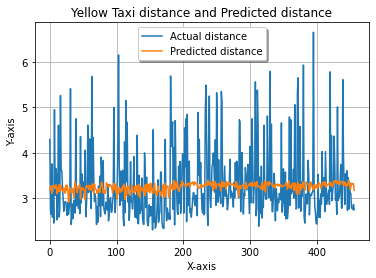

In [49]:
x_axis_y = range(0, tdata_y.count())
y_pred_y = tdata_y.select("prediction").collect()
y_orig_y = tdata_y.select("distance").collect()

yellow_plot_glr = plt.plot(x_axis_y, y_orig_y, label="Actual distance")
yellow_plot_glr = plt.plot(x_axis_y, y_pred_y, label="Predicted distance")
yellow_plot_glr = plt.title("Yellow Taxi distance and Predicted distance")
yellow_plot_glr = plt.xlabel('X-axis')
yellow_plot_glr = plt.ylabel('Y-axis')
yellow_plot_glr = plt.legend(loc='best',fancybox=True, shadow=True)
yellow_plot_glr = plt.grid(True)
yellow_plot_glr

In [34]:


x_ax = range(0, tdata.count())
y_pred=tdata.select("prediction").collect()
y_orig=tdata.select("target").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  


sc.stop() 

NameError: name 'tdata' is not defined